# EDA and Visualization

This Notebook demonstrates main functions of EDA (Exploratory Data Analysis) and uses several visualizations. Note: The notebook can be easily reused for new datasets as long as the datasets have the same format as "data_cars.csv". In case of other data formats, some transformations have to be performed in order to achieve the needed data format and the rest of the notebook can be reused.

After reading the dataset, the following actions are performed to explore the data

- displaying the column names of the data
- displaying the first and the last rows
- checking data types
- determining dimensionalities
- statistical summaries of columns
- drawing random samples of the data
- checking for missing values
- checking for duplicates
- determining cross correlations
- dropping unneeded columns
- renaming columns

In [1]:
# We will need the libraries pandas and numpy for data manipulation.
import pandas as pd
import numpy as np

In [3]:
# reading the data
#machine dataset of Matzka, S.: Maschinenpark-Datensatz. https://webdrive.htw-berlin.de/public/file/3HzjsGktgECUtEDLZ-ezDQ/datensetMaschinenpark.csv. Version: 2021
df = pd.read_csv("Machine_Dataset.csv",sep=';')

In [4]:
df=df.sort_values(by=['Day'])
df

,Day,Machine,Product,Pmax(W),Energy(kWh),Fault
0,1,1,B,416,2.196,no
20,1,3,A,414,1.584,no
10,1,2,A,412,1.498,yes
1,2,1,B,409,1.723,yes
21,2,3,B,413,1.991,no
11,2,2,A,424,1.944,no
2,3,1,B,408,2.556,no
22,3,3,B,416,2.012,no
12,3,2,B,408,2.256,no
3,4,1,B,415,2.605,no


In [5]:
# To display the top 5 rows 
df.head()
#By default, it returns the first 5 rows of the Dataframe. To change the default,
# you may insert a value between the parenthesis to change the number of rows returned.

,Day,Machine,Product,Pmax(W),Energy(kWh),Fault
0,1,1,B,416,2.196,no
20,1,3,A,414,1.584,no
10,1,2,A,412,1.498,yes
1,2,1,B,409,1.723,yes
21,2,3,B,413,1.991,no


In [11]:
df.columns
# Return the column labels of the dataframe.

Index(['Day', 'Machine', 'Product', 'Pmax(W)', 'Energy(kWh)', 'Fault'], dtype='object')

In [12]:
df.tail(10)                        # To display the botton 10 rows
#By default, it returns the last 5 rows of the Dataframe. This function is used to get the last n rows. 
#This function returns the last n rows from the object based on position.

,Day,Machine,Product,Pmax(W),Energy(kWh),Fault
26,7,3,B,414,1.998,no
17,8,2,A,412,1.872,no
7,8,1,B,414,2.078,yes
27,8,3,A,418,1.608,no
28,9,3,A,416,1.596,no
18,9,2,A,414,1.884,no
8,9,1,B,406,2.542,no
9,10,1,B,403,2.521,no
19,10,2,A,398,1.788,no
29,10,3,A,409,1.554,no


In [13]:
df.dtypes
# Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, 
# if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. 
# Here, in this case, the data is already in integer format so nothing to worry.

Day              int64
Machine          int64
Product         object
Pmax(W)          int64
Energy(kWh)    float64
Fault           object
dtype: object

In [14]:
df.shape
# It shows the number of dimensions as well as the size in each dimension. 
# Since data frames are two-dimensional, what shape returns is the number of rows and columns.

(30, 6)

In [15]:
df.ndim
#Returns dimension of dataframe/series. 1 for one dimension (series), 2 for two dimensions (dataframe).

2

In [16]:
df.describe()
# Return a statistical summary for numerical columns present in the dataset. 
# This method calculates some statistical measures like percentile, mean and standard deviation of the 
# numerical values of the Series or DataFrame.

,Day,Machine,Pmax(W),Energy(kWh)
count,30.000000,30.000000,30.000000,30.00000
mean,5.500000,2.000000,412.133333,1.95330
std,2.921384,0.830455,6.441960,0.37769
min,1.000000,1.000000,398.000000,1.30600
25%,3.000000,1.000000,408.250000,1.59900
50%,5.500000,2.000000,412.500000,1.96750
75%,8.000000,3.000000,416.000000,2.20050
max,10.000000,3.000000,425.000000,2.60500


In [17]:
df.isnull().sum()
#df.isna().sum()
#Return the number of missing values in each column.

Day            0
Machine        0
Product        0
Pmax(W)        0
Energy(kWh)    0
Fault          0
dtype: int64

In [19]:
df.nunique(0)
# Return number of unique elements per column.
# It is very useful in categorical features especially in cases where we do not know the number of categories beforehand.

Day            10
Machine         3
Product         2
Pmax(W)        19
Energy(kWh)    30
Fault           2
dtype: int64

In [22]:
df['Machine'].value_counts()

1    10
3    10
2    10
Name: Machine, dtype: int64

In [25]:
df.duplicated().sum()

0

# Visualization

In [28]:
import seaborn as sns                       #visualization
import matplotlib.pyplot as plt             #visualization
%matplotlib inline     
sns.set(color_codes=True)

<AxesSubplot:xlabel='Pmax(W)'>

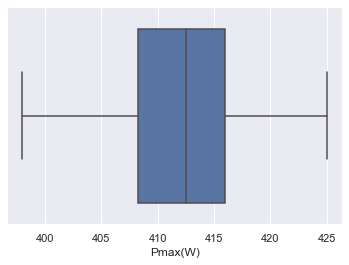

In [30]:
# Detecting outliers
sns.boxplot(x=df['Pmax(W)'])

<AxesSubplot:xlabel='Energy(kWh)'>

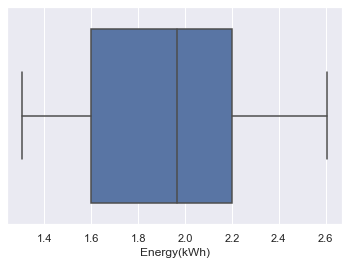

In [31]:
sns.boxplot(x=df['Energy(kWh)'])

In [32]:
#Interquartile range IQR
# IQR is a measure of the dispersion similar to standard deviation or variance,
# but is much more robust against outliers.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Day            5.0000
Machine        2.0000
Pmax(W)        7.7500
Energy(kWh)    0.6015
dtype: float64


In [35]:
df[((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)].shape

C:\Users\Mirko\AppData\Local\Temp/ipykernel_20820/810973873.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)].shape


(0, 6)

Text(0.5, 0, 'Fault?')

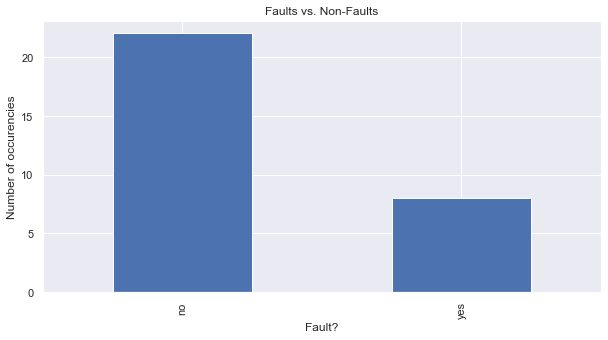

In [39]:
# A histogram shows the frequency of occurrence of variables in an interval. 
df.Fault.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Faults vs. Non-Faults')
plt.ylabel('Number of occurencies')
plt.xlabel('Fault?')

<AxesSubplot:xlabel='Machine', ylabel='Pmax(W)'>

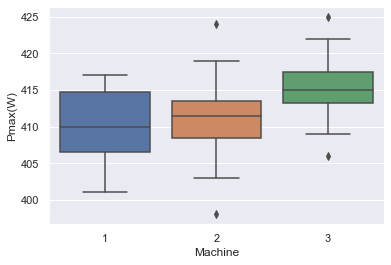

In [42]:
sns.boxplot(x="Machine", y="Pmax(W)", data=df)

<AxesSubplot:xlabel='Machine', ylabel='Energy(kWh)'>

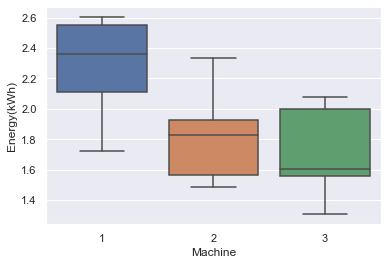

In [43]:
sns.boxplot(x="Machine", y="Energy(kWh)", data=df)

In [57]:
df1=df.loc[df['Machine'] == 1]
df2=df.loc[df['Machine'] == 2]
df3=df.loc[df['Machine'] == 3]

Text(0.5, 1.0, 'Machine 3')

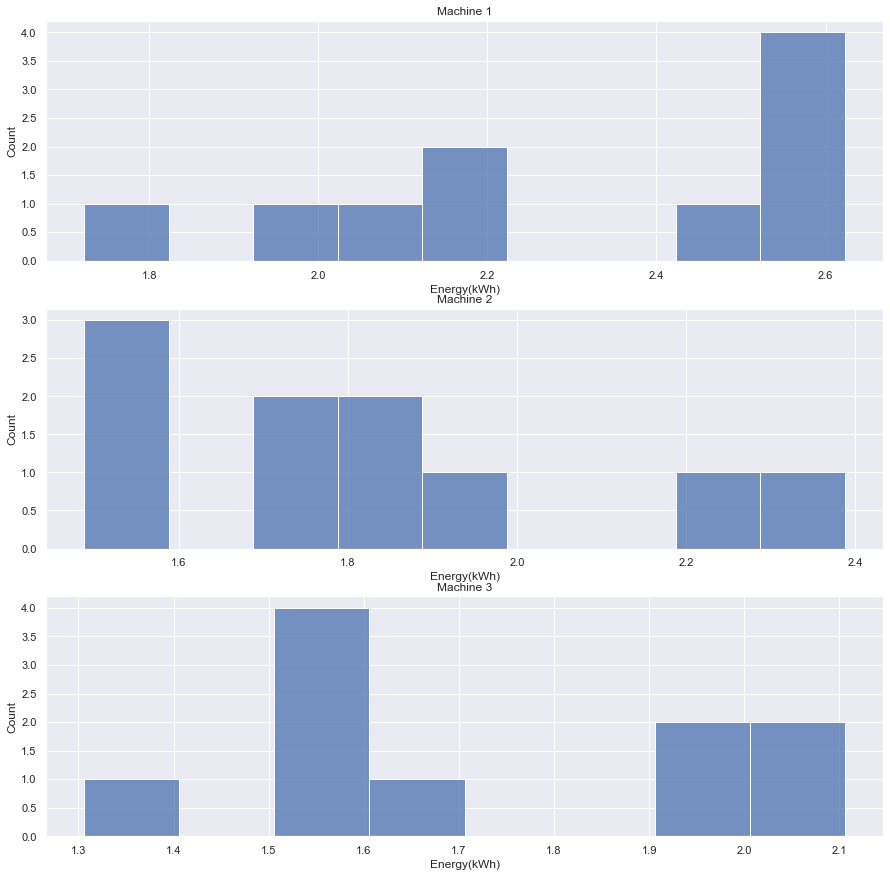

In [86]:
f, axs = plt.subplots(3,1,figsize=(15,15))  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(3, 1, 1) # (rows, columns, panel number)
sns.histplot(data=df1,x='Energy(kWh)',binwidth=0.1)
plt.title('Machine 1')

plt.subplot(3, 1, 2) # (rows, columns, panel number)
sns.histplot(data=df2,x='Energy(kWh)',binwidth=0.1)
plt.title('Machine 2')

plt.subplot(3, 1, 3) # (rows, columns, panel number)
sns.histplot(data=df3,x='Energy(kWh)',binwidth=0.1)
plt.title('Machine 3')

<AxesSubplot:>

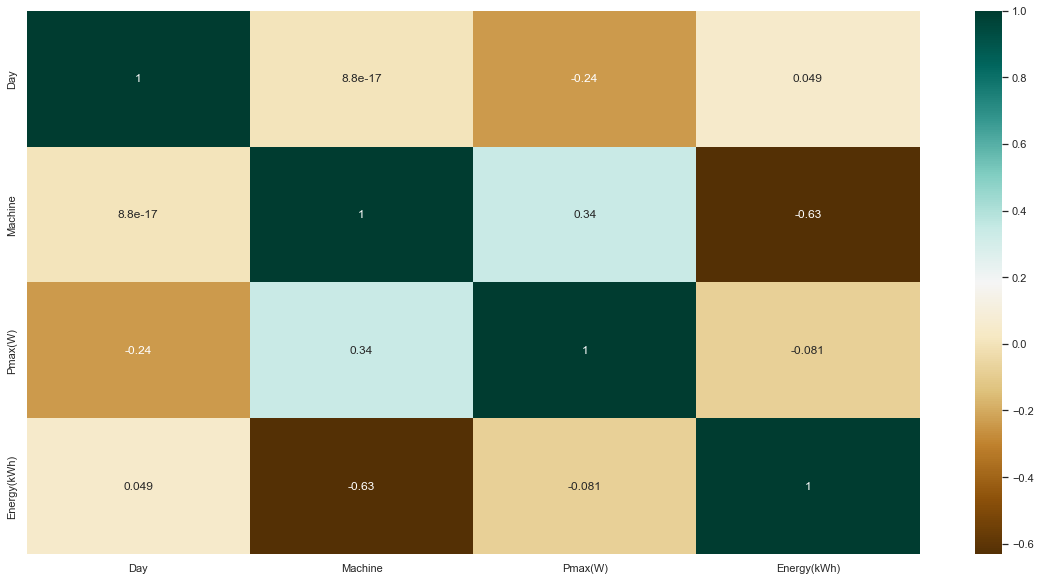

In [40]:
# A Heat Map is a plot that can be used to find dependent variables. 
fig1=plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

It can be seen that the price feature depends mainly on the year, Horsepower, and Cylinders.

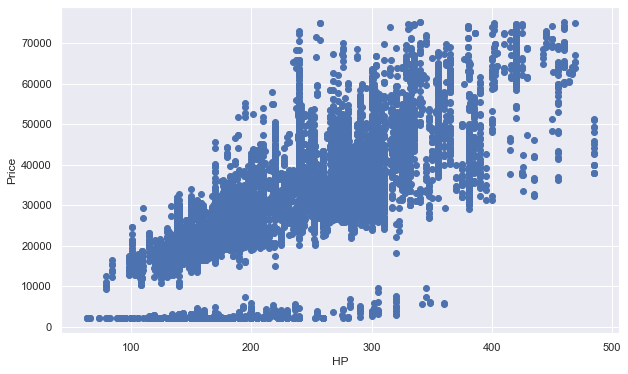

In [107]:
# A Scatter Plots can be used to find the correlation between two variables. Here the scatter 
# plots are plotted between Horsepower and Price.
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()
fig.savefig('scatterplot.png')